In [1]:
import pandas as pd
import numpy as np
import h5py

In [2]:
df = pd.DataFrame() # Make an empty data frame; you can also use a python dict here 


with h5py.File('../data/archive/vel_err_orb_err_rvcorr_all.h5','r') as f:
    print(f.keys()) # Print what columns are in the file
    for key in ['Etot', 'JR', 'Jphi', 'Jz', 'KE', 'Lx', 'Ly', 'Lz', 'PE', 'U', 'V', 'W', 'XGC', 'YGC', 'ZGC','ecc','source_id','vphi', 'vr', 'vz','zmax']:
        print(key)
        print(f[key])
        df[key] = np.array(f[key])



<KeysViewHDF5 ['Etot', 'JR', 'Jphi', 'Jz', 'KE', 'Lx', 'Ly', 'Lz', 'PE', 'U', 'V', 'W', 'XGC', 'YGC', 'ZGC', 'apo', 'cov_UV', 'cov_UW', 'cov_VW', 'cov_vphiz', 'cov_vrphi', 'cov_vrz', 'e_Etot', 'e_JR', 'e_Jphi', 'e_Jz', 'e_KE', 'e_Lx', 'e_Ly', 'e_Lz', 'e_PE', 'e_U', 'e_V', 'e_W', 'e_XGC', 'e_YGC', 'e_ZGC', 'e_apo', 'e_ecc', 'e_peri', 'e_vphi', 'e_vr', 'e_vz', 'e_zmax', 'ecc', 'f_v_forder', 'parallax_zpcorr', 'peri', 'source_id', 'vphi', 'vr', 'vz', 'zero_point_correction', 'zmax']>
Etot
<HDF5 dataset "Etot": shape (33812183,), type "<f8">
JR
<HDF5 dataset "JR": shape (33812183,), type "<f8">
Jphi
<HDF5 dataset "Jphi": shape (33812183,), type "<f8">
Jz
<HDF5 dataset "Jz": shape (33812183,), type "<f8">
KE
<HDF5 dataset "KE": shape (33812183,), type "<f8">
Lx
<HDF5 dataset "Lx": shape (33812183,), type "<f8">
Ly
<HDF5 dataset "Ly": shape (33812183,), type "<f8">
Lz
<HDF5 dataset "Lz": shape (33812183,), type "<f8">
PE
<HDF5 dataset "PE": shape (33812183,), type "<f8">
U
<HDF5 dataset "U":

In [3]:
chem = pd.read_csv('../data/archive/spec_logg_mh_alphafe_callibrated.csv')

In [4]:
c_chem_columns = [key for key in chem.columns if 'Unnamed' not in key]
c_IoM_kinematics_columns = [key for key in df.columns if 'Unnamed' not in key]
chem = chem[c_chem_columns]
df = df[c_IoM_kinematics_columns]

In [5]:
merged_data = pd.merge(chem, df, on="source_id", validate="one_to_one")

In [6]:
merged_data.columns

Index(['source_id', 'teff_gspspec', 'teff_gspspec_lower', 'teff_gspspec_upper',
       'logg_gspspec', 'logg_gspspec_lower', 'logg_gspspec_upper',
       'mh_gspspec', 'mh_gspspec_lower', 'mh_gspspec_upper', 'alphafe_gspspec',
       'alphafe_gspspec_lower', 'alphafe_gspspec_upper', 'mgfe_gspspec',
       'mgfe_gspspec_lower', 'mgfe_gspspec_upper', 'fem_gspspec',
       'fem_gspspec_lower', 'fem_gspspec_upper', 'Etot', 'JR', 'Jphi', 'Jz',
       'KE', 'Lx', 'Ly', 'Lz', 'PE', 'U', 'V', 'W', 'XGC', 'YGC', 'ZGC', 'ecc',
       'vphi', 'vr', 'vz', 'zmax'],
      dtype='object')

In [9]:
merged_data = merged_data.iloc[np.random.choice(len(merged_data), 1000)]

/tmp/ipykernel_258637/4197555843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['RGC'] = np.linalg.norm([merged_data['XGC'], merged_data['YGC'], merged_data['ZGC']], axis=0)


<AxesSubplot:>

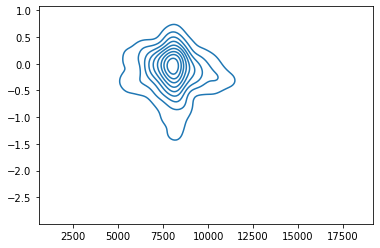

In [14]:
import seaborn as sns
merged_data['RGC'] = np.linalg.norm([merged_data['XGC'], merged_data['YGC'], merged_data['ZGC']], axis=0)
sns.kdeplot(x=merged_data['RGC'].to_numpy(), y=merged_data['mh_gspspec'].to_numpy())

In [2]:
df = pd.read_pickle('DR3_6D_kinematics.pkl')

In [3]:
df.to_csv('DR3_6D_kinematics.csv')